<a href="https://colab.research.google.com/github/sarahsyarofina/clusteringtable2/blob/master/SarahSyarofina_MiniBatchKMeans_Clustering_Levenshtein_DPP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score as dbi
from sklearn.metrics import pairwise_distances

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
%cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [4]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-05-05 17:00:47--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-05-05 17:00:47--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - done

## Package Plan ##

  environment 

In [5]:
!pip install sklearn
!pip install fuzzywuzzy
!pip install docopt
!python kmeans-fuzz.py

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
Usage:
kmeans-fuzz.py all --in INPUT_FILE_NAME --clusters NUM_CLUSTERS --out OUTPUT_FILE_NAME [--fp_type FP_TYPE] [--dim FP_DIM] [--sample SAMPLE_SIZE] 
kmeans-fuzz.py fp --in INPUT_FILE_NAME [--dim FP_DIM] [--fp_type FP_TYPE]
kmeans-fuzz.py cluster --fp_file FP_FILE_NAME --clusters CLUSTER_FILE_NAME --out OUTPUT_FILE_NAME [--sample SAMPLE_SIZE]


In [0]:
!python kmeans-fuzz.py all --in pp_out.sdf --clusters 1540 --out ecfp4_1540_klaster.csv --fp_type ecfp4 --dim 1024
!python kmeans-fuzz.py all --in pp_out.sdf --clusters 1540 --out ecfp6_1540_klaster.csv --fp_type ecfp6 --dim 1024
!python kmeans-fuzz.py all --in pp_out.sdf --clusters 1540 --out fcfp4_1540_klaster.csv --fp_type fcfp4 --dim 1024
!python kmeans-fuzz.py all --in pp_out.sdf --clusters 1540 --out fcfp6_1540_klaster.csv --fp_type fcfp6 --dim 1024
!python kmeans-fuzz.py all --in pp_out.sdf --clusters 1540 --out maccs_1540_klaster.csv --fp_type maccs --dim 167

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
Generating ecfp4 fingerprints with 1024 bits
100% 3079/3079 [00:01<00:00, 1951.37it/s]
0.0 sec required to generate dataframe
Processing chunk: 100% 7/7 [00:00<00:00, 17.07it/s]
Clustered 3079 into 1540 in 79.0 sec
/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
Generating ecfp6 fingerprints with 1024 bits
100% 3079/3079 [00:01<00:00, 1837.56it/s]
0.0 sec required to generate dataframe
Processing chunk: 100% 7/7 [00:00<00:00, 16.82it/s]
Clustered 3079 into 1540 in 78.2 sec
/usr/local/lib/python3

In [0]:
ecfp4 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/ecfp4.csv', delimiter=';')
ecfp6 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/ecfp6.csv', delimiter=';')
fcfp4 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/fcfp4.csv', delimiter=';')
fcfp6 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/fcfp6.csv', delimiter=';')
maccs = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/maccs.csv', delimiter=',')

In [0]:
just_ecfp4 = ecfp4.drop(columns = ['SMILES','Name'])
just_ecfp6 = ecfp6.drop(columns = ['SMILES','Name'])
just_fcfp4 = fcfp4.drop(columns = ['SMILES','Name'])
just_fcfp6 = fcfp6.drop(columns = ['SMILES','Name'])
just_maccs = maccs.drop(columns = ['SMILES','Name'])

In [0]:
#ECFP4seed0
distortions = []
d1 = just_ecfp4
for n_clusters in range (1520,1571):
    clusterer = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, init_size=3*n_clusters)
    cluster_labels = clusterer.fit_predict(d1)
    dis = clusterer.inertia_
    chb = metrics.calinski_harabasz_score(d1, cluster_labels)
    sil_scr = silhouette_score(d1, cluster_labels)
    dbindex = dbi(d1, cluster_labels)
    distortions.append({'num_cluster':n_clusters,'dis':dis,'sil':sil_scr,'dbi':dbindex, 'chb':chb})

tabelnya = pd.DataFrame(distortions)
tabelnya

,num_cluster,dis,sil,dbi,chb
0,1520,21000.769082,0.254858,0.794275,10.614316
1,1521,20591.816492,0.239982,0.823800,9.923526
2,1522,20058.397070,0.243547,0.832024,9.969787
3,1523,21373.453490,0.253932,0.784064,10.475052
4,1524,20498.028053,0.250682,0.795218,10.479232
5,1525,20969.555586,0.253744,0.794890,10.569919
6,1526,21084.023625,0.254041,0.800096,10.611026
7,1527,21502.336353,0.250696,0.820846,10.316582
8,1528,20885.592056,0.251677,0.811173,10.365731
9,1529,20805.042478,0.246566,0.837989,10.095866


In [0]:
#ECFP4seed2
distortions_2 = []
d1_2 = just_ecfp4
for n_clusters_2 in range (1520,1571):
    clusterer_2 = MiniBatchKMeans(n_clusters=n_clusters_2, random_state=2, init_size=3*n_clusters)
    cluster_labels_2 = clusterer_2.fit_predict(d1_2)
    dis_2 = clusterer_2.inertia_
    chb_2 = metrics.calinski_harabasz_score(d1_2, cluster_labels_2)
    sil_scr_2 = silhouette_score(d1_2, cluster_labels_2)
    dbindex_2 = dbi(d1_2, cluster_labels_2)
    distortions_2.append({'num_cluster':n_clusters_2,'dis':dis_2,'sil':sil_scr_2,'dbi':dbindex_2, 'chb':chb_2})

tabelnya_2 = pd.DataFrame(distortions_2)
tabelnya_2

,num_cluster,dis,sil,dbi,chb
0,1520,21213.832339,0.250874,0.782911,10.589503
1,1521,20247.653865,0.254088,0.784751,10.694923
2,1522,20875.130737,0.252851,0.799215,10.586185
3,1523,21191.998010,0.253625,0.794594,10.584271
4,1524,21066.814371,0.250762,0.781172,10.621150
5,1525,20476.474564,0.251653,0.788530,10.586156
6,1526,21289.184809,0.245378,0.886346,10.184725
7,1527,20723.545222,0.241328,0.847955,10.091858
8,1528,21193.471647,0.244752,0.893370,10.123150
9,1529,21098.444837,0.253190,0.834740,10.566512


In [0]:
#ECFP4seed4
distortions_4 = []
d1_4 = just_ecfp4
for n_clusters_4 in range (1520,1571):
    clusterer_4 = MiniBatchKMeans(n_clusters=n_clusters_4, random_state=4, init_size=3*n_clusters)
    cluster_labels_4 = clusterer_4.fit_predict(d1_4)
    dis_4 = clusterer_4.inertia_
    chb_4 = metrics.calinski_harabasz_score(d1_4, cluster_labels_4)
    sil_scr_4 = silhouette_score(d1_4, cluster_labels_4)
    dbindex_4 = dbi(d1_4, cluster_labels_4)
    distortions_4.append({'num_cluster':n_clusters_4,'dis':dis_4,'sil':sil_scr_4,'dbi':dbindex_4, 'chb':chb_4})

tabelnya_4 = pd.DataFrame(distortions_4)
tabelnya_4

,num_cluster,dis,sil,dbi,chb
0,1520,20104.012256,0.243867,0.854264,10.026605
1,1521,20143.322507,0.242954,0.869368,9.929429
2,1522,20118.849902,0.244422,0.853183,10.029553
3,1523,21458.193123,0.241516,0.834689,10.000471
4,1524,21387.127073,0.238329,0.899435,9.978590
5,1525,21231.534529,0.246480,0.825618,10.140562
6,1526,20941.539731,0.250808,0.814424,10.390109
7,1527,20271.179966,0.243157,0.849005,10.001058
8,1528,21441.909894,0.245312,0.836976,10.083093
9,1529,20664.535712,0.251577,0.798889,10.516808


In [0]:
#ECFP4seed6
distortions_6 = []
d1_6 = just_ecfp4
for n_clusters_6 in range (1520,1571):
    clusterer_6 = MiniBatchKMeans(n_clusters=n_clusters_6, random_state=6, init_size=3*n_clusters)
    cluster_labels_6 = clusterer_6.fit_predict(d1_6)
    dis_6 = clusterer_6.inertia_
    chb_6 = metrics.calinski_harabasz_score(d1_6, cluster_labels_6)
    sil_scr_6 = silhouette_score(d1_6, cluster_labels_6)
    dbindex_6 = dbi(d1_6, cluster_labels_6)
    distortions_6.append({'num_cluster':n_clusters_6,'dis':dis_6,'sil':sil_scr_6,'dbi':dbindex_6, 'chb':chb_6})

tabelnya_6 = pd.DataFrame(distortions_6)
tabelnya_6

,num_cluster,dis,sil,dbi,chb
0,1520,20908.258681,0.254055,0.812714,10.429315
1,1521,20935.726480,0.247115,0.818953,10.151241
2,1522,20694.913342,0.243283,0.823412,10.204156
3,1523,19354.031751,0.251027,0.825083,10.174956
4,1524,21154.884661,0.250484,0.784964,10.553665
5,1525,20947.286959,0.257398,0.780043,10.612679
6,1526,21102.708547,0.250516,0.791146,10.593739
7,1527,20996.474685,0.252474,0.810442,10.320318
8,1528,19743.237408,0.252888,0.899847,10.303413
9,1529,19930.042127,0.252562,0.824637,10.303718


In [0]:
#ECFP6seed0
distortions2 = []
d2 = just_ecfp6
for n_clusters2 in range (1520,1571):
    clusterer2 = MiniBatchKMeans(n_clusters=n_clusters2, random_state=0, init_size=3*n_clusters)
    cluster_labels2 = clusterer2.fit_predict(d2)
    dis2 = clusterer2.inertia_
    chb2 = metrics.calinski_harabasz_score(d2, cluster_labels2)
    sil_scr2 = silhouette_score(d2, cluster_labels2)
    dbindex2 = dbi(d2, cluster_labels2)
    distortions2.append({'num_cluster':n_clusters2,'dis':dis2,'sil':sil_scr2,'dbi':dbindex2, 'chb':chb2})

tabelnya2 = pd.DataFrame(distortions2)
tabelnya2

,num_cluster,dis,sil,dbi,chb
0,1520,28690.478839,0.244173,0.835964,8.649185
1,1521,28513.800838,0.239041,0.866669,8.266856
2,1522,29800.828548,0.240348,0.834954,8.577662
3,1523,28975.021961,0.245982,0.809742,8.780552
4,1524,29139.633622,0.243766,0.835603,8.684345
5,1525,28730.969952,0.247992,0.826405,8.749370
6,1526,29118.156190,0.243438,0.807685,8.694839
7,1527,28926.357893,0.251811,0.820384,8.863858
8,1528,28466.010892,0.236976,0.843485,8.365240
9,1529,28994.448812,0.239745,0.873252,8.346999


In [0]:
#ECFP6seed2
distortions2_2 = []
d2_2 = just_ecfp6
for n_clusters2_2 in range (1520,1571):
    clusterer2_2 = MiniBatchKMeans(n_clusters=n_clusters2_2, random_state=2, init_size=3*n_clusters)
    cluster_labels2_2 = clusterer2_2.fit_predict(d2_2)
    dis2_2 = clusterer2_2.inertia_
    chb2_2 = metrics.calinski_harabasz_score(d2_2, cluster_labels2_2)
    sil_scr2_2 = silhouette_score(d2_2, cluster_labels2_2)
    dbindex2_2 = dbi(d2_2, cluster_labels2_2)
    distortions2_2.append({'num_cluster':n_clusters2_2,'dis':dis2_2,'sil':sil_scr2_2,'dbi':dbindex2_2, 'chb':chb2_2})

tabelnya2_2 = pd.DataFrame(distortions2_2)
tabelnya2_2

,num_cluster,dis,sil,dbi,chb
0,1520,29960.140075,0.244053,0.856934,8.597138
1,1521,29084.697521,0.238214,0.890413,8.453651
2,1522,29541.693922,0.243767,0.815670,8.796422
3,1523,28132.499159,0.248151,0.856241,8.752081
4,1524,28094.890373,0.243104,0.844961,8.679686
5,1525,29093.096331,0.237548,0.871667,8.403192
6,1526,28029.978594,0.243920,0.881389,8.505266
7,1527,28562.799504,0.243216,0.847770,8.520838
8,1528,29546.689010,0.240720,0.856135,8.512585
9,1529,29062.161116,0.248655,0.840976,8.780695


In [0]:
#ECFP6seed4
distortions2_4 = []
d2_4 = just_ecfp6
for n_clusters2_4 in range (1520,1571):
    clusterer2_4 = MiniBatchKMeans(n_clusters=n_clusters2_4, random_state=4, init_size=3*n_clusters)
    cluster_labels2_4 = clusterer2_4.fit_predict(d2_4)
    dis2_4 = clusterer2_4.inertia_
    chb2_4 = metrics.calinski_harabasz_score(d2_4, cluster_labels2_4)
    sil_scr2_4 = silhouette_score(d2_4, cluster_labels2_4)
    dbindex2_4 = dbi(d2_4, cluster_labels2_4)
    distortions2_4.append({'num_cluster':n_clusters2_4,'dis':dis2_4,'sil':sil_scr2_4,'dbi':dbindex2_4, 'chb':chb2_4})

tabelnya2_4 = pd.DataFrame(distortions2_4)
tabelnya2_4

,num_cluster,dis,sil,dbi,chb
0,1520,28012.861315,0.241715,0.845825,8.662264
1,1521,29451.378594,0.241807,0.858261,8.550464
2,1522,28270.921914,0.237484,0.848295,8.603253
3,1523,28446.571810,0.243402,0.839627,8.684742
4,1524,28198.587985,0.240981,0.850385,8.690962
5,1525,29427.778263,0.235521,0.827135,8.591192
6,1526,29221.944942,0.248496,0.851382,8.810572
7,1527,29272.088054,0.240009,0.882007,8.478351
8,1528,28589.486476,0.242953,0.869783,8.528118
9,1529,29137.656386,0.248502,0.840715,8.738172


In [0]:
#ECFP6seed6
distortions2_6 = []
d2_6 = just_ecfp6
for n_clusters2_6 in range (1520,1571):
    clusterer2_6 = MiniBatchKMeans(n_clusters=n_clusters2_6, random_state=6, init_size=3*n_clusters)
    cluster_labels2_6 = clusterer2_6.fit_predict(d2_6)
    dis2_6 = clusterer2_6.inertia_
    chb2_6 = metrics.calinski_harabasz_score(d2_6, cluster_labels2_6)
    sil_scr2_6 = silhouette_score(d2_6, cluster_labels2_6)
    dbindex2_6 = dbi(d2_6, cluster_labels2_6)
    distortions2_6.append({'num_cluster':n_clusters2_6,'dis':dis2_6,'sil':sil_scr2_6,'dbi':dbindex2_6, 'chb':chb2_6})

tabelnya2_6 = pd.DataFrame(distortions2_6)
tabelnya2_6

,num_cluster,dis,sil,dbi,chb
0,1520,28362.083195,0.246688,0.849765,8.682742
1,1521,28445.046701,0.250954,0.816617,8.941664
2,1522,28532.383986,0.247489,0.818695,8.844275
3,1523,28654.122179,0.246452,0.889742,8.698029
4,1524,29172.355268,0.246587,0.810997,8.757873
5,1525,28827.642496,0.252193,0.821721,8.878906
6,1526,29326.887452,0.242573,0.874154,8.466982
7,1527,28375.942240,0.247622,0.832206,8.799700
8,1528,26702.885628,0.244130,0.891510,8.476329
9,1529,26859.631389,0.246355,0.888685,8.491544


In [0]:
#FCFP4seed0
distortions3 = []
d3 = just_fcfp4
for n_clusters3 in range (1520,1571):
    clusterer3 = MiniBatchKMeans(n_clusters=n_clusters3, random_state=0, init_size=3*n_clusters)
    cluster_labels3 = clusterer3.fit_predict(d3)
    dis3 = clusterer3.inertia_
    chb3 = metrics.calinski_harabasz_score(d3, cluster_labels3)
    sil_scr3 = silhouette_score(d3, cluster_labels3)
    dbindex3 = dbi(d3, cluster_labels3)
    distortions3.append({'num_cluster':n_clusters3,'dis':dis3,'sil':sil_scr3,'dbi':dbindex3, 'chb':chb3})

tabelnya3 = pd.DataFrame(distortions3)
tabelnya3

,num_cluster,dis,sil,dbi,chb
0,1520,13551.820934,0.302630,0.718138,14.346771
1,1521,14149.361825,0.300436,0.769934,13.740756
2,1522,13350.268652,0.301524,0.751997,13.830733
3,1523,13503.469297,0.307183,0.705565,14.408969
4,1524,13886.189612,0.301788,0.788878,13.816030
5,1525,13081.218251,0.302555,0.726735,13.960287
6,1526,13314.639572,0.304612,0.732103,14.224578
7,1527,13390.222628,0.298963,0.735107,13.851076
8,1528,13265.828753,0.298758,0.750504,13.707115
9,1529,13046.789455,0.303982,0.744617,13.795737


In [0]:
#FCFP4seed2
distortions3_2 = []
d3_2 = just_fcfp4
for n_clusters3_2 in range (1520,1571):
    clusterer3_2 = MiniBatchKMeans(n_clusters=n_clusters3_2, random_state=2, init_size=3*n_clusters3_2)
    cluster_labels3_2 = clusterer3_2.fit_predict(d3_2)
    dis3_2 = clusterer3_2.inertia_
    chb3_2 = metrics.calinski_harabasz_score(d3_2, cluster_labels3_2)
    sil_scr3_2 = silhouette_score(d3_2, cluster_labels3_2)
    dbindex3_2 = dbi(d3_2, cluster_labels3_2)
    distortions3_2.append({'num_cluster':n_clusters3_2,'dis':dis3_2,'sil':sil_scr3_2,'dbi':dbindex3_2, 'chb':chb3_2})

tabelnya3_2 = pd.DataFrame(distortions3_2)
tabelnya3_2

,num_cluster,dis,sil,dbi,chb
0,1520,13974.575131,0.299140,0.765664,13.556097
1,1521,13190.432832,0.307799,0.724260,14.410769
2,1522,14360.271347,0.296430,0.757348,13.652210
3,1523,13518.108889,0.304155,0.728284,14.307580
4,1524,12995.524483,0.298052,0.718223,14.059727
5,1525,13648.177138,0.294677,0.750035,13.487760
6,1526,13778.562450,0.297002,0.762175,13.346485
7,1527,13454.064144,0.296211,0.748734,13.675161
8,1528,13112.659345,0.305118,0.727542,14.027106
9,1529,13941.779025,0.300470,0.749287,13.529794


In [0]:
#FCFP4seed4
distortions3_4 = []
d3_4 = just_fcfp4
for n_clusters3_4 in range (1520,1571):
    clusterer3_4 = MiniBatchKMeans(n_clusters=n_clusters3_4, random_state=4, init_size=3*n_clusters3_4)
    cluster_labels3_4 = clusterer3_4.fit_predict(d3_4)
    dis3_4 = clusterer3_4.inertia_
    chb3_4 = metrics.calinski_harabasz_score(d3_4, cluster_labels3_4)
    sil_scr3_4 = silhouette_score(d3_4, cluster_labels3_4)
    dbindex3_4 = dbi(d3_4, cluster_labels3_4)
    distortions3_4.append({'num_cluster':n_clusters3_4,'dis':dis3_4,'sil':sil_scr3_4,'dbi':dbindex3_4, 'chb':chb3_4})

tabelnya3_4 = pd.DataFrame(distortions3_4)
tabelnya3_4

,num_cluster,dis,sil,dbi,chb
0,1520,13532.732160,0.301696,0.772176,14.187361
1,1521,13352.977351,0.304184,0.714309,14.284840
2,1522,13685.565370,0.303362,0.731623,13.943881
3,1523,13548.754117,0.297028,0.735938,14.006185
4,1524,13470.950698,0.301140,0.752709,14.088642
5,1525,13534.783776,0.297560,0.730483,13.994781
6,1526,13294.189781,0.301783,0.727450,14.275106
7,1527,13583.210083,0.295991,0.780240,13.496553
8,1528,13305.459046,0.303207,0.779143,13.345601
9,1529,13768.630195,0.296718,0.812223,13.352532


In [0]:
#FCFP4seed6
distortions3_6 = []
d3_6 = just_fcfp4
for n_clusters3_6 in range (1520,1571):
    clusterer3_6 = MiniBatchKMeans(n_clusters=n_clusters3_6, random_state=6, init_size=3*n_clusters3_6)
    cluster_labels3_6 = clusterer3_6.fit_predict(d3_6)
    dis3_6 = clusterer3_6.inertia_
    chb3_6 = metrics.calinski_harabasz_score(d3_6, cluster_labels3_6)
    sil_scr3_6 = silhouette_score(d3_6, cluster_labels3_6)
    dbindex3_6 = dbi(d3_6, cluster_labels3_6)
    distortions3_6.append({'num_cluster':n_clusters3_6,'dis':dis3_6,'sil':sil_scr3_6,'dbi':dbindex3_6, 'chb':chb3_6})

tabelnya3_6 = pd.DataFrame(distortions3_6)
tabelnya3_6

,num_cluster,dis,sil,dbi,chb
0,1520,14276.679322,0.292961,0.749873,13.431990
1,1521,13454.621529,0.301039,0.709025,14.230716
2,1522,13531.441765,0.298362,0.737169,13.751918
3,1523,13816.058322,0.297196,0.746198,13.519101
4,1524,13670.374005,0.304512,0.702805,14.300075
5,1525,13615.977975,0.305445,0.738372,14.261231
6,1526,13975.810396,0.300460,0.766363,13.646113
7,1527,13933.143784,0.296868,0.755218,13.576709
8,1528,12770.897864,0.300790,0.751356,13.763647
9,1529,13764.404241,0.305164,0.788012,13.482327


In [0]:
#FCFP6seed0
distortions4 = []
d4 = just_fcfp6
for n_clusters4 in range (1520,1571):
    clusterer4 = MiniBatchKMeans(n_clusters=n_clusters4, random_state=0, init_size=3*n_clusters4)
    cluster_labels4 = clusterer4.fit_predict(d4)
    dis4 = clusterer4.inertia_
    chb4 = metrics.calinski_harabasz_score(d4, cluster_labels4)
    sil_scr4 = silhouette_score(d4, cluster_labels4)
    dbindex4 = dbi(d4, cluster_labels4)
    distortions4.append({'num_cluster':n_clusters4,'dis':dis4,'sil':sil_scr4,'dbi':dbindex4, 'chb':chb4})

tabelnya4 = pd.DataFrame(distortions4)
tabelnya4

,num_cluster,dis,sil,dbi,chb
0,1520,19765.299482,0.295453,0.732711,11.630429
1,1521,19544.952655,0.290723,0.759519,11.231961
2,1522,19212.102249,0.288824,0.762113,11.225267
3,1523,20112.753370,0.289557,0.775429,11.349080
4,1524,19898.996926,0.295499,0.761697,11.393467
5,1525,19405.769467,0.293726,0.766146,11.353573
6,1526,19612.017614,0.291866,0.759856,11.400935
7,1527,19468.724014,0.293212,0.743642,11.394951
8,1528,20078.702627,0.288588,0.761089,11.163511
9,1529,19385.078995,0.293385,0.807097,11.027083


In [0]:
#FCFP6seed2
distortions4_2 = []
d4_2 = just_fcfp6
for n_clusters4_2 in range (1520,1571):
    clusterer4_2 = MiniBatchKMeans(n_clusters=n_clusters4_2, random_state=2, init_size=3*n_clusters4_2)
    cluster_labels4_2 = clusterer4_2.fit_predict(d4_2)
    dis4_2 = clusterer4_2.inertia_
    chb4_2 = metrics.calinski_harabasz_score(d4_2, cluster_labels4_2)
    sil_scr4_2 = silhouette_score(d4_2, cluster_labels4_2)
    dbindex4_2 = dbi(d4_2, cluster_labels4_2)
    distortions4_2.append({'num_cluster':n_clusters4_2,'dis':dis4_2,'sil':sil_scr4_2,'dbi':dbindex4_2, 'chb':chb4_2})

tabelnya4_2 = pd.DataFrame(distortions4_2)
tabelnya4_2

,num_cluster,dis,sil,dbi,chb
0,1520,19675.465037,0.292988,0.758138,11.547128
1,1521,19871.481735,0.294091,0.767090,11.541003
2,1522,19618.320106,0.297638,0.748376,11.683686
3,1523,19834.575469,0.290659,0.751523,11.566287
4,1524,19439.840052,0.294842,0.743331,11.619699
5,1525,20480.077703,0.292285,0.819938,10.995843
6,1526,19875.781532,0.286534,0.807536,10.902190
7,1527,20165.892285,0.294349,0.794866,10.951283
8,1528,19376.060879,0.299182,0.785690,11.718362
9,1529,18969.423464,0.303122,0.815688,11.571584


In [0]:
#FCFP6seed4
distortions4_4 = []
d4_4 = just_fcfp6
for n_clusters4_4 in range (1520,1571):
    clusterer4_4 = MiniBatchKMeans(n_clusters=n_clusters4_4, random_state=4, init_size=3*n_clusters4_4)
    cluster_labels4_4 = clusterer4_4.fit_predict(d4_4)
    dis4_4 = clusterer4_4.inertia_
    chb4_4 = metrics.calinski_harabasz_score(d4_4, cluster_labels4_4)
    sil_scr4_4 = silhouette_score(d4_4, cluster_labels4_4)
    dbindex4_4 = dbi(d4_4, cluster_labels4_4)
    distortions4_4.append({'num_cluster':n_clusters4_4,'dis':dis4_4,'sil':sil_scr4_4,'dbi':dbindex4_4, 'chb':chb4_4})

tabelnya4_4 = pd.DataFrame(distortions4_4)
tabelnya4_4

,num_cluster,dis,sil,dbi,chb
0,1520,19420.706354,0.295797,0.755039,11.563292
1,1521,20059.492868,0.291331,0.906394,10.805021
2,1522,19562.589401,0.286015,0.861386,10.935819
3,1523,19517.661895,0.297746,0.777161,11.578079
4,1524,19173.212584,0.295998,0.723287,11.649230
5,1525,19325.723699,0.293690,0.724170,11.497860
6,1526,19722.702677,0.294896,0.738764,11.500270
7,1527,18874.396453,0.293588,0.756300,11.460317
8,1528,19380.693120,0.293426,0.783926,10.917822
9,1529,20236.478544,0.289287,0.783968,10.817992


In [0]:
#FCFP6seed6
distortions4_6 = []
d4_6 = just_fcfp6
for n_clusters4_6 in range (1520,1571):
    clusterer4_6 = MiniBatchKMeans(n_clusters=n_clusters4_6, random_state=6, init_size=3*n_clusters4_6)
    cluster_labels4_6 = clusterer4_6.fit_predict(d4_6)
    dis4_6 = clusterer4_6.inertia_
    chb4_6 = metrics.calinski_harabasz_score(d4_6, cluster_labels4_6)
    sil_scr4_6 = silhouette_score(d4_6, cluster_labels4_6)
    dbindex4_6 = dbi(d4_6, cluster_labels4_6)
    distortions4_6.append({'num_cluster':n_clusters4_6,'dis':dis4_6,'sil':sil_scr4_6,'dbi':dbindex4_6, 'chb':chb4_6})

tabelnya4_6 = pd.DataFrame(distortions4_6)
tabelnya4_6

,num_cluster,dis,sil,dbi,chb
0,1520,19341.461056,0.288681,0.730471,11.560212
1,1521,19088.467658,0.290778,0.737596,11.484742
2,1522,19519.239729,0.296595,0.759816,11.383141
3,1523,20105.814613,0.298764,0.774991,11.350499
4,1524,19239.370520,0.293192,0.759805,11.436482
5,1525,19593.291874,0.295183,0.771925,11.353651
6,1526,19550.888703,0.292128,0.806680,11.301524
7,1527,20328.224816,0.292650,0.786976,11.379726
8,1528,19871.212693,0.294035,0.797532,11.025605
9,1529,19938.307825,0.286709,0.774584,11.112916


In [0]:
#MACCSseed0
distortions5 = []
d5 = just_maccs
for n_clusters5 in range (1520,1571):
    clusterer5 = MiniBatchKMeans(n_clusters=n_clusters5, random_state=0, init_size=3*n_clusters5)
    cluster_labels5 = clusterer5.fit_predict(d5)
    dis5 = clusterer5.inertia_
    chb5 = metrics.calinski_harabasz_score(d5, cluster_labels5)
    sil_scr5 = silhouette_score(d5, cluster_labels5)
    dbindex5 = dbi(d5, cluster_labels5)
    distortions5.append({'num_cluster':n_clusters5,'dis':dis5,'sil':sil_scr5,'dbi':dbindex5, 'chb':chb5})

tabelnya5 = pd.DataFrame(distortions5)
tabelnya5

,num_cluster,dis,sil,dbi,chb
0,1520,10407.601313,0.298120,0.552759,331034.261198
1,1521,10498.429472,0.289944,0.580563,315157.718950
2,1522,10133.817513,0.291133,0.571822,317853.229312
3,1523,10589.032771,0.287592,0.580122,307477.764363
4,1524,10310.509838,0.294342,0.552816,326262.334362
5,1525,10132.357563,0.299319,0.549250,331106.519529
6,1526,10462.798042,0.284560,0.581880,311384.789011
7,1527,10470.641816,0.289297,0.575359,316983.360605
8,1528,10227.091741,0.300752,0.555110,333212.241848
9,1529,10227.592857,0.298466,0.553561,330162.163834


In [0]:
#MACCSseed2
distortions5_2 = []
d5_2 = just_maccs
for n_clusters5_2 in range (1520,1571):
    clusterer5_2 = MiniBatchKMeans(n_clusters=n_clusters5_2, random_state=2, init_size=3*n_clusters5_2)
    cluster_labels5_2 = clusterer5_2.fit_predict(d5_2)
    dis5_2 = clusterer5_2.inertia_
    chb5_2 = metrics.calinski_harabasz_score(d5_2, cluster_labels5_2)
    sil_scr5_2 = silhouette_score(d5_2, cluster_labels5_2)
    dbindex5_2 = dbi(d5_2, cluster_labels5_2)
    distortions5_2.append({'num_cluster':n_clusters5_2,'dis':dis5_2,'sil':sil_scr5_2,'dbi':dbindex5_2, 'chb':chb5_2})

tabelnya5_2 = pd.DataFrame(distortions5_2)
tabelnya5_2

,num_cluster,dis,sil,dbi,chb
0,1520,10399.055874,0.303349,0.564284,334398.610564
1,1521,10565.503824,0.300307,0.561609,328154.757410
2,1522,10799.581796,0.289808,0.571551,311068.554016
3,1523,10728.391308,0.275438,0.592317,302762.995639
4,1524,10262.271824,0.290087,0.568867,318020.889806
5,1525,10199.693076,0.294077,0.564902,319798.718307
6,1526,10476.143799,0.282511,0.583526,310198.547895
7,1527,10549.538518,0.286907,0.574020,317435.808001
8,1528,10418.864484,0.290692,0.576838,314650.162415
9,1529,10614.660557,0.288757,0.575724,316749.253846


In [0]:
#MACCSseed4
distortions5_4 = []
d5_4 = just_maccs
for n_clusters5_4 in range (1520,1571):
    clusterer5_4 = MiniBatchKMeans(n_clusters=n_clusters5_4, random_state=4, init_size=3*n_clusters5_4)
    cluster_labels5_4 = clusterer5_4.fit_predict(d5_4)
    dis5_4 = clusterer5_4.inertia_
    chb5_4 = metrics.calinski_harabasz_score(d5_4, cluster_labels5_4)
    sil_scr5_4 = silhouette_score(d5_4, cluster_labels5_4)
    dbindex5_4 = dbi(d5_4, cluster_labels5_4)
    distortions5_4.append({'num_cluster':n_clusters5_4,'dis':dis5_4,'sil':sil_scr5_4,'dbi':dbindex5_4, 'chb':chb5_4})

tabelnya5_4 = pd.DataFrame(distortions5_4)
tabelnya5_4

,num_cluster,dis,sil,dbi,chb
0,1520,10656.151893,0.296263,0.562031,328411.710535
1,1521,10496.004415,0.296616,0.557950,328485.507694
2,1522,10307.987067,0.285287,0.570706,310376.297985
3,1523,10422.002820,0.283424,0.581370,309675.389333
4,1524,9987.268887,0.289780,0.569916,316698.852812
5,1525,10479.932511,0.282745,0.584775,309333.038525
6,1526,10134.174772,0.297457,0.555910,331485.228500
7,1527,9605.686782,0.303760,0.556019,340651.602430
8,1528,10137.030629,0.300382,0.551663,325724.429216
9,1529,9984.340383,0.306911,0.546954,337035.327855


In [0]:
#MACCSseed6
distortions5_6 = []
d5_6 = just_maccs
for n_clusters5_6 in range (1520,1571):
    clusterer5_6 = MiniBatchKMeans(n_clusters=n_clusters5_6, random_state=6, init_size=3*n_clusters5_6)
    cluster_labels5_6 = clusterer5_6.fit_predict(d5_6)
    dis5_6 = clusterer5_6.inertia_
    chb5_6 = metrics.calinski_harabasz_score(d5_6, cluster_labels5_6)
    sil_scr5_6 = silhouette_score(d5_6, cluster_labels5_6)
    dbindex5_6 = dbi(d5_6, cluster_labels5_6)
    distortions5_6.append({'num_cluster':n_clusters5_6,'dis':dis5_6,'sil':sil_scr5_6,'dbi':dbindex5_6, 'chb':chb5_6})

tabelnya5_6 = pd.DataFrame(distortions5_6)
tabelnya5_6

,num_cluster,dis,sil,dbi,chb
0,1520,10114.562631,0.296241,0.554933,323335.705977
1,1521,9864.867760,0.295111,0.548271,327185.209992
2,1522,9919.964415,0.299945,0.551880,331048.653033
3,1523,10328.397911,0.278874,0.582935,304306.863145
4,1524,10044.112616,0.298576,0.559419,331677.730394
5,1525,10134.223411,0.298920,0.545717,333787.591975
6,1526,10233.441171,0.285807,0.581977,310814.455078
7,1527,9969.389083,0.298271,0.555803,330731.928658
8,1528,10651.513520,0.281302,0.586061,307304.299871
9,1529,10341.832589,0.296984,0.553561,328355.628012


In [0]:
tabel1 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp4_0.csv', delimiter=';')
tabel2 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp4_2.csv', delimiter=';')
tabel3 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp4_4.csv', delimiter=';')
tabel4 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp4_6.csv', delimiter=';')
tabel5 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp6_0.csv', delimiter=';')
tabel6 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp6_2.csv', delimiter=';')
tabel7 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp6_4.csv', delimiter=';')
tabel8 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/ecfp6_6.csv', delimiter=';')
tabel9 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp4_0.csv', delimiter=';')
tabel10 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp4_2.csv', delimiter=';')
tabel11 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp4_4.csv', delimiter=';')
tabel12 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp4_6.csv', delimiter=';')
tabel13 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp6_0.csv', delimiter=';')
tabel14 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp6_2.csv', delimiter=';')
tabel15 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp6_4.csv', delimiter=';')
tabel16 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/fcfp6_6.csv', delimiter=';')
tabel17 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/maccs_0.csv', delimiter=';')
tabel18 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/maccs_2.csv', delimiter=';')
tabel19 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/maccs_4.csv', delimiter=';')
tabel20 = pd.read_csv('drive/My Drive/TESIS SARAH/DATA/plot/maccs_6.csv', delimiter=';')

In [0]:
tabel1a = tabel1.iloc[18:24]
tabel2a = tabel2.iloc[18:24]
tabel3a = tabel3.iloc[18:24]
tabel4a = tabel4.iloc[18:24]
tabel5a = tabel5.iloc[18:24]
tabel6a = tabel6.iloc[18:24]
tabel7a = tabel7.iloc[18:24]
tabel8a = tabel8.iloc[18:24]
tabel9a = tabel9.iloc[18:24]
tabel10a = tabel10.iloc[18:24]
tabel11a = tabel11.iloc[18:24]
tabel12a = tabel12.iloc[18:24]
tabel13a = tabel13.iloc[18:24]
tabel14a = tabel14.iloc[18:24]
tabel15a = tabel15.iloc[18:24]
tabel16a = tabel16.iloc[18:24]
tabel17a = tabel17.iloc[18:24]
tabel18a = tabel18.iloc[18:24]
tabel19a = tabel19.iloc[18:24]
tabel20a = tabel20.iloc[18:24]

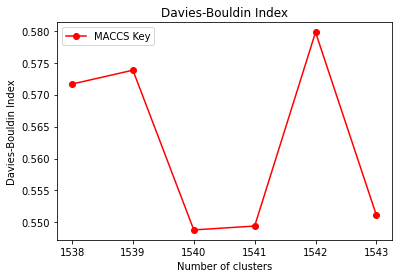

In [0]:
# sphinx_gallery_thumbnail
import matplotlib.pyplot as plt
import numpy as np

plt.figure()


#plt.plot(tabel2a.num_cluster, tabel2a.dbi, label='ECFP4',marker = "o",color='r')
#plt.plot(tabel7a.num_cluster, tabel7a.dbi, label='ECFP6',marker = "o", color='r')
#plt.plot(tabel9a.num_cluster, tabel9a.dbi, label='FCFP4',marker = "o", color='r')
#plt.plot(tabel16a.num_cluster, tabel16a.dbi, label='FCFP6',marker = "o", color='r')
plt.plot(tabel17a.num_cluster, tabel17a.dbi, label='MACCS Key',marker = "o",color='r')

plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')

plt.title("Davies-Bouldin Index")

plt.legend()

plt.show()

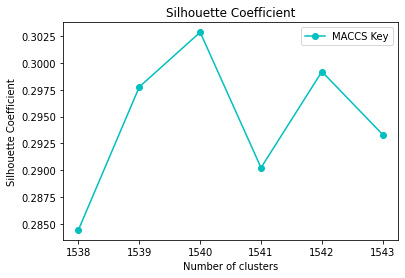

In [0]:
# sphinx_gallery_thumbnail
import matplotlib.pyplot as plt
import numpy as np

plt.figure()


#plt.plot(tabel2a.num_cluster, tabel2a.sil, label='ECFP4',marker = "o", color='c')
#plt.plot(tabel7a.num_cluster, tabel7a.sil, label='ECFP6',marker = "o", color='c')
#plt.plot(tabel10a.num_cluster, tabel10a.sil, label='FCFP4',marker = "o", color='c')
#plt.plot(tabel16a.num_cluster, tabel16a.sil, label='FCFP6',marker = "o", color='c')
plt.plot(tabel19a.num_cluster, tabel19a.sil, label='MACCS Key',marker = "o", color='c')

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

plt.title("Silhouette Coefficient")

plt.legend()

plt.show()

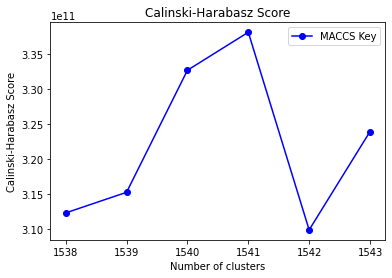

In [0]:
# sphinx_gallery_thumbnail
import matplotlib.pyplot as plt
import numpy as np

plt.figure()


#plt.plot(tabel2a.num_cluster, tabel2a.chb, label='ECFP4',marker = "o", color='b')
#plt.plot(tabel7a.num_cluster, tabel7a.chb, label='ECFP6',marker = "o", color='b')
#plt.plot(tabel10a.num_cluster, tabel10a.chb, label='FCFP4',marker = "o", color='b')
#plt.plot(tabel16a.num_cluster, tabel16a.chb, label='FCFP6',marker = "o", color='b')
plt.plot(tabel17a.num_cluster, tabel17a.chb, label='MACCS Key',marker = "o", color='b')

plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.title("Calinski-Harabasz Score")

plt.legend()

plt.show()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [7]:
import pandas as pd
import rdkit 
from rdkit.Chem import PandasTools
from rdkit.Chem.Crippen import MolLogP
from numpy import vectorize as vec
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors,PandasTools


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
from google.colab import files
uploaded = files.upload()

Saving ecfp6_1540.csv to ecfp6_1540.csv


In [11]:
! ls -la

total 120454
-rw------- 1 root root   626803 Jul 31  2019 'BARU DPP4 LDA.ipynb'
-rw------- 1 root root   413826 May  5 17:27  CLUSTERS
-rw------- 1 root root  1838076 Sep 25  2019 'Copy of BARU DPP4 KMEANS'
-rw------- 1 root root   635331 Aug 20  2019 'Copy of BARU DPP4 KMEANS (1)'
-rw------- 1 root root   599907 Aug 10  2019 'Copy of BARU DPP4 KMEANS (2)'
-rw------- 1 root root    96060 Apr 21 14:09 'Copy of Copy of Copy of Copy of Copy of Untitled6.ipynb'
-rw------- 1 root root   133020 Apr 21 19:35 'Copy of Copy of Copy of Copy of Untitled6.ipynb'
-rw------- 1 root root   130214 Apr 21 18:42 'Copy of Copy of Copy of Untitled6.ipynb'
-rw------- 1 root root   130796 Apr 21 18:38 'Copy of Copy of Untitled6.ipynb'
-rw------- 1 root root   202099 May  3 06:39 'Copy of ecfp4_1540_klaster.csv'
-rw------- 1 root root   202140 May  3 06:39 'Copy of ecfp6_1540_klaster.csv'
-rw------- 1 root root   202151 May  3 06:39 'Copy of fcfp4_1540_klaster.csv'
-rw------- 1 root root   202129 May  3 06:3

In [0]:
d1 = pd.read_csv('ecfp4_1540.csv', delimiter=';')
d2 = pd.read_csv('ecfp6_1540.csv', delimiter=';')
d3 = pd.read_csv('fcfp4_1540.csv', delimiter=';')
d4 = pd.read_csv('fcfp6_1540.csv', delimiter=';')
d5 = pd.read_csv('maccs_1540.csv', delimiter=';')

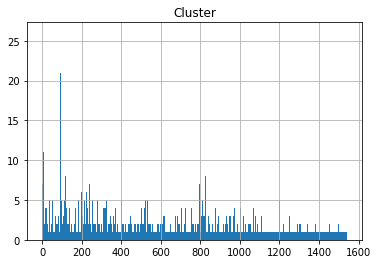

In [22]:
ax1 = d1.hist("Cluster",bins=1540)

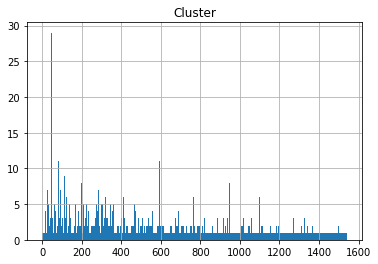

In [24]:
ax2 = d2.hist("Cluster",bins=1540)

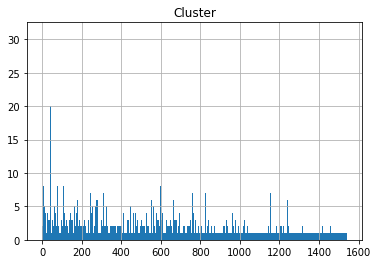

In [25]:
ax3 = d3.hist("Cluster",bins=1540)

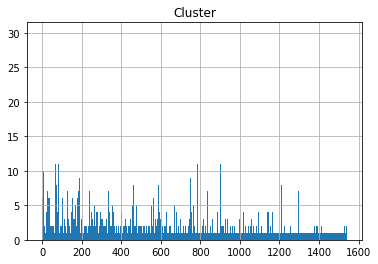

In [26]:
ax4 = d4.hist("Cluster",bins=1540)

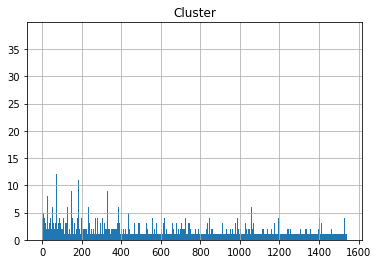

In [27]:
ax5 = d5.hist("Cluster",bins=1540)

In [0]:
PandasTools.AddMoleculeColumnToFrame(d1,'SMILES','Mol')
PandasTools.AddMoleculeColumnToFrame(d2,'SMILES','Mol')
PandasTools.AddMoleculeColumnToFrame(d3,'SMILES','Mol')
PandasTools.AddMoleculeColumnToFrame(d4,'SMILES','Mol')
PandasTools.AddMoleculeColumnToFrame(d5,'SMILES','Mol')

,SMILES,Name,Cluster,Center,Mol
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1209,Yes,
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,33,Yes,

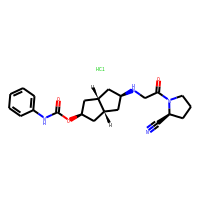
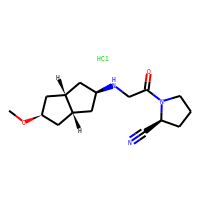

In [30]:
d1.head(2)

,SMILES,Name,Cluster,Center,Mol
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1127,Yes,
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,205,Yes,

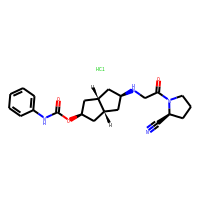
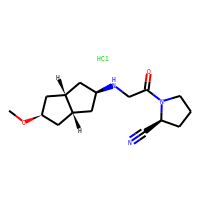

In [31]:
d2.head(2)

,SMILES,Name,Cluster,Center,Mol
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1156,Yes,
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,33,Yes,

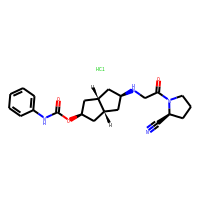
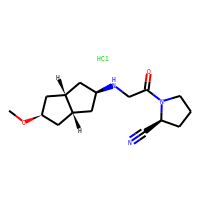

In [32]:
d3.head(2)

,SMILES,Name,Cluster,Center,Mol
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1209,Yes,
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,273,Yes,

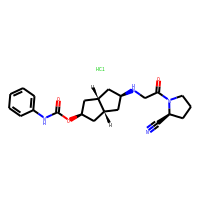
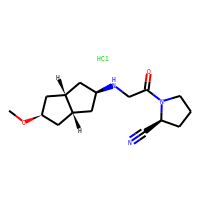

In [33]:
d4.head(2)

,SMILES,Name,Cluster,Center,Mol
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1065,Yes,
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,132,Yes,

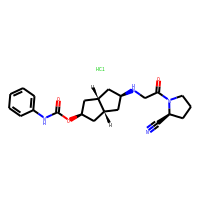
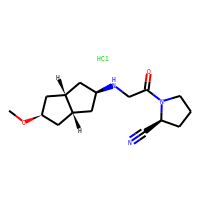

In [34]:
d5.head(2)

In [35]:
%time d1['LogP'] = [MolLogP(x) for x in d1.Mol]

CPU times: user 975 ms, sys: 2.87 ms, total: 978 ms
Wall time: 979 ms


In [36]:
%time d2['LogP'] = [MolLogP(x) for x in d2.Mol]

CPU times: user 998 ms, sys: 0 ns, total: 998 ms
Wall time: 1.01 s


In [37]:
%time d3['LogP'] = [MolLogP(x) for x in d3.Mol]

CPU times: user 1 s, sys: 902 µs, total: 1 s
Wall time: 1 s


In [38]:
%time d4['LogP'] = [MolLogP(x) for x in d4.Mol]

CPU times: user 988 ms, sys: 888 µs, total: 989 ms
Wall time: 989 ms


In [39]:
%time d5['LogP'] = [MolLogP(x) for x in d5.Mol]

CPU times: user 1.01 s, sys: 2.9 ms, total: 1.01 s
Wall time: 1.01 s


,SMILES,Name,Cluster,Center,Mol,LogP
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1209,Yes,,3.31828
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,33,Yes,,1.71598

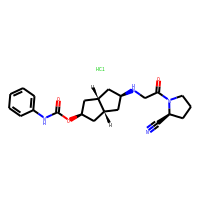
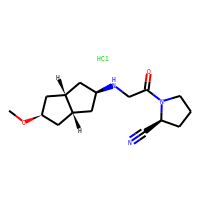

In [40]:
d1.head(2)

,SMILES,Name,Cluster,Center,Mol,LogP
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1127,Yes,,3.31828
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,205,Yes,,1.71598

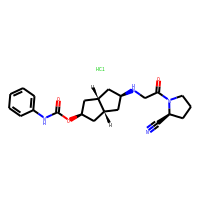
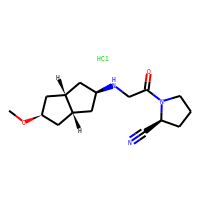

In [42]:
d2.head(2)

,SMILES,Name,Cluster,Center,Mol,LogP
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1156,Yes,,3.31828
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,33,Yes,,1.71598

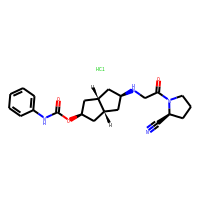
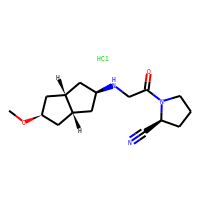

In [43]:
d3.head(2)

,SMILES,Name,Cluster,Center,Mol,LogP
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1209,Yes,,3.31828
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,273,Yes,,1.71598

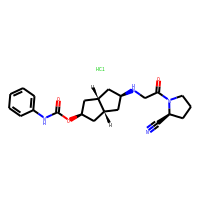
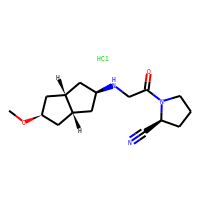

In [44]:
d4.head(2)

,SMILES,Name,Cluster,Center,Mol,LogP
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1209,Yes,,3.31828
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,273,Yes,,1.71598

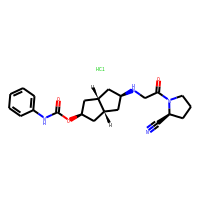
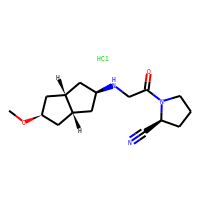

In [45]:
d4.head(2)

,SMILES,Name,Cluster,Center,Mol,LogP
0,Cl.N#C[C@@H]1CCCN1C(=O)CN[C@H]1C[C@H]2C[C@@H](...,CHEMBL1082345,1065,Yes,,3.31828
1,CO[C@H]1C[C@@H]2C[C@H](NCC(=O)N3CCC[C@H]3C#N)C...,CHEMBL1082346,132,Yes,,1.71598

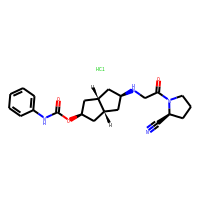
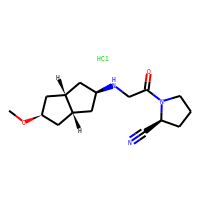

In [46]:
d5.head(2)

In [0]:
d1.sort_values("LogP",inplace=True)
d2.sort_values("LogP",inplace=True)
d3.sort_values("LogP",inplace=True)
d4.sort_values("LogP",inplace=True)
d5.sort_values("LogP",inplace=True)

In [0]:
d1.drop("Mol",1,inplace=True)
d2.drop("Mol",1,inplace=True)
d3.drop("Mol",1,inplace=True)
d4.drop("Mol",1,inplace=True)
d5.drop("Mol",1,inplace=True)

In [0]:
d1.to_csv("ecfp4_before_selected.csv",index=False,float_format="%0.2f")
d2.to_csv("ecfp6_before_selected.csv",index=False,float_format="%0.2f")
d3.to_csv("fcfp4_before_selected.csv",index=False,float_format="%0.2f")
d4.to_csv("fcfp6_before_selected.csv",index=False,float_format="%0.2f")
d5.to_csv("maccs_before_selected.csv",index=False,float_format="%0.2f")

In [0]:
d1_selected = pd.DataFrame(d1.drop_duplicates("Cluster"))
d2_selected = pd.DataFrame(d2.drop_duplicates("Cluster"))
d3_selected = pd.DataFrame(d3.drop_duplicates("Cluster"))
d4_selected = pd.DataFrame(d4.drop_duplicates("Cluster"))
d5_selected = pd.DataFrame(d5.drop_duplicates("Cluster"))

In [0]:
d1_selected.to_csv("ecfp4_selected.csv",index=False,float_format="%0.2f")
d2_selected.to_csv("ecfp6_selected.csv",index=False,float_format="%0.2f")
d3_selected.to_csv("fcfp4_selected.csv",index=False,float_format="%0.2f")
d4_selected.to_csv("fcfp6_selected.csv",index=False,float_format="%0.2f")
d5_selected.to_csv("maccs_selected.csv",index=False,float_format="%0.2f")